<a href="https://colab.research.google.com/github/Pradnya1208/Intent-classification-based-food-delivery-chatbot/blob/main/Chatbot%20implementation/Initial_Chatbot_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

### Read the json file

In [137]:
with open('/content/intents.json') as file:
    data = json.load(file)
    
train_patterns = [] # patterns
train_intents = [] # tags
labels = [] #tags
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        train_patterns.append(pattern)
        train_intents.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [138]:
print("train_patterns :", train_patterns[100])
print("train_intents :", train_intents[100])
print("num_classes :", num_classes)

train_patterns : What to eat
train_intents : menu
num_classes : 22


### Then we use `LabelEncoder()` function provided by scikit-learn to convert the target labels into a model understandable form.

In [139]:
label_encoder = LabelEncoder()
label_encoder.fit(train_intents)
train_intents = label_encoder.transform(train_intents)

In [140]:
train_intents

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13

## Vectorization

- We vectorize our text data corpus by using the “Tokenizer” class and it allows us to limit our vocabulary size up to some defined number. 

- When we use this class for the text pre-processing task, by default all punctuations will be removed, turning the texts into space-separated sequences of words, and these sequences are then split into lists of tokens. 

- They will then be indexed or vectorized. We can also add “oov_token” which is a value for “out of token” to deal with out of vocabulary words(tokens) at inference time.

- The “pad_sequences” method is used to make all the training text sequences into the same size.

In [141]:
vocab_size = 11250
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=None)
tokenizer.fit_on_texts(train_patterns)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_patterns)

padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [142]:
print("word indexes:" , word_index)

word indexes: {'the': 1, 'i': 2, 'you': 3, 'what': 4, 'are': 5, 'a': 6, 'me': 7, 'to': 8, 'food': 9, 'options': 10, 'have': 11, 'is': 12, 'menu': 13, 'do': 14, 'can': 15, 'want': 16, 'any': 17, 'of': 18, 'please': 19, 'your': 20, 'good': 21, 'book': 22, 'there': 23, 'in': 24, 'this': 25, 'table': 26, 'show': 27, 'vegan': 28, 'veg': 29, 'see': 30, 'am': 31, 'order': 32, 'available': 33, 'restaurant': 34, 'on': 35, 'eat': 36, 'vegetarian': 37, 'non': 38, 'tables': 39, 'how': 40, 'service': 41, 'and': 42, 'staff': 43, 'place': 44, 'tell': 45, 'could': 46, 'help': 47, 'now': 48, 'bye': 49, 'open': 50, 'hours': 51, 'address': 52, 'money': 53, 'it': 54, 'hate': 55, 'offers': 56, 'dish': 57, 'hey': 58, 'very': 59, 'with': 60, 'we': 61, 'whats': 62, 'something': 63, 'get': 64, 'contact': 65, 'so': 66, 'about': 67, 'chicken': 68, 'morning': 69, 'day': 70, 'seat': 71, 'for': 72, 'know': 73, 'great': 74, 'name': 75, 'should': 76, 'like': 77, 'give': 78, 'some': 79, 'number': 80, 'location': 81, '

In [143]:
print("train_patterns :", train_patterns[99])
print("sequences: ", sequences[99])

train_patterns : I am hungry
sequences:  [2, 31, 127]


## 1) Here, we have to deal with multiple inputs or multiple outputs. Hence, we'll use `Keras` `Sequential()` model.

read more : [Kears Sequential model details](https://keras.io/guides/sequential_model/)

## 2) Loss Function: `sparse_categorical_crossentropy` : We are using this crossentropy loss function when there are two or more label classes.
read more about [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

In [144]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 16)            180000    
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 22)                374       
                                                                 
Total params: 180,918
Trainable params: 180,918
Non-trainable params: 0
________________________________________________

In [145]:

epochs = 500
history = model.fit(padded_sequences, np.array(train_intents), epochs=epochs)

Epoch 1/500
12/12 [==============================] - 1s 20ms/step - loss: 3.0858 - accuracy: 0.1223
Epoch 2/500
12/12 [==============================] - 0s 17ms/step - loss: 3.0774 - accuracy: 0.1304
Epoch 3/500
12/12 [==============================] - 0s 23ms/step - loss: 3.0692 - accuracy: 0.1304
Epoch 4/500
12/12 [==============================] - 0s 27ms/step - loss: 3.0597 - accuracy: 0.1304
Epoch 5/500
12/12 [==============================] - 0s 28ms/step - loss: 3.0488 - accuracy: 0.1304
Epoch 6/500
12/12 [==============================] - 0s 33ms/step - loss: 3.0364 - accuracy: 0.1304
Epoch 7/500
12/12 [==============================] - 0s 24ms/step - loss: 3.0237 - accuracy: 0.1304
Epoch 8/500
12/12 [==============================] - 0s 27ms/step - loss: 3.0074 - accuracy: 0.1304
Epoch 9/500
12/12 [==============================] - 0s 23ms/step - loss: 2.9915 - accuracy: 0.1304
Epoch 10/500
12/12 [==============================] - 0s 33ms/step - loss: 2.9726 - accuracy: 0.1304

In [146]:
history_dict = history.history

Text(0.5, 0, 'Epochs')

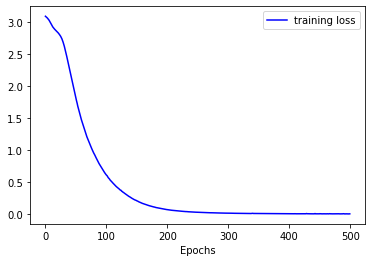

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


loss_values = history_dict['loss']
#val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
#plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

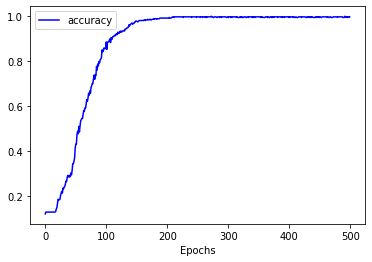

In [148]:
accuracy_values = history_dict['accuracy']
#val_accuracy_values=history_dict['val_accuracy']
#plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

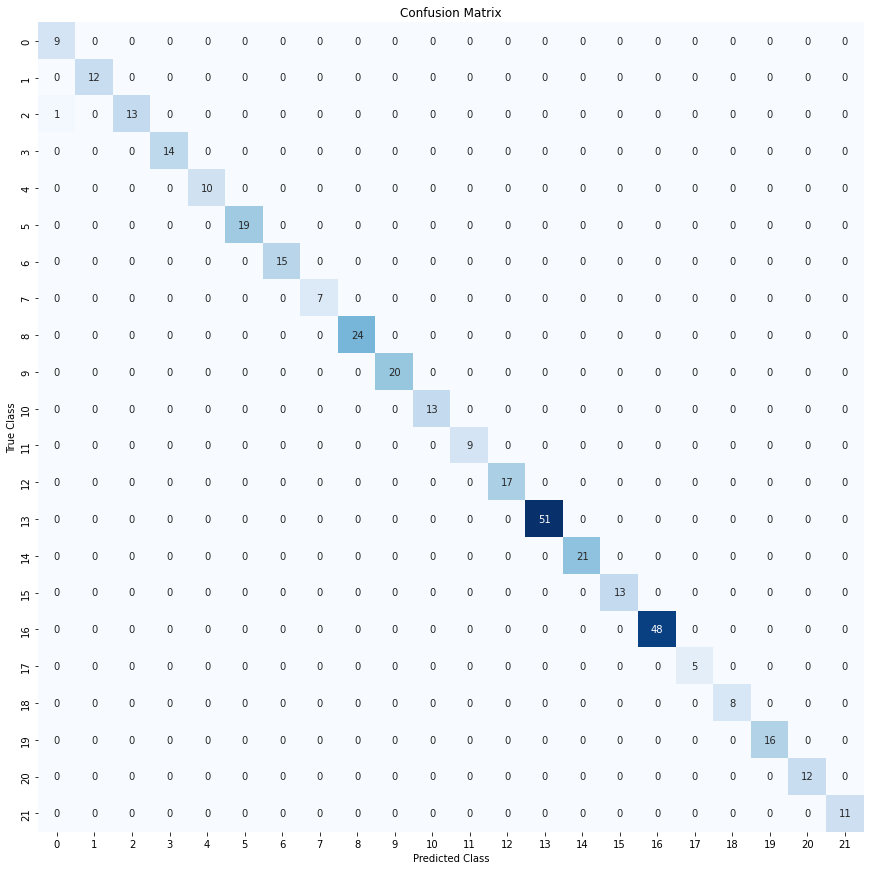

In [150]:
y_pred = model.predict(padded_sequences)
y_result=[]
for i in y_pred:
  max_value = max(i)
  #print(max_value)
  y_result.append(np.where(i == max_value)[0][0])



#CM matrix for training data
plt.figure(figsize=(12,12))

matrix_nn = confusion_matrix(y_result, np.array(train_intents))

sns.heatmap(matrix_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Save the models

We are saving 3 different things separately
- Classification model
- fitted Tokenizer object
- fitted label encoder object

In [151]:
# saving model
model.save("chat_model")

import pickle

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# saving label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


In [152]:
!pip install colorama

In [168]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("/content/intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),truncating='post', maxlen=max_len))
        #print("result: ", result)
        print(result.max())
        print(np.where(result == (result.max())))

        ## Find the intent
        tag = lbl_encoder.inverse_transform([np.argmax(result)])
        print(tag)

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()


Start messaging with the bot (type quit to stop)!
User: Hello
0.99978906
(array([0]), array([9]))
['greeting']
ChatBot: Hi! I'm Restrobot. How may I assist you today?
User: who are you
0.99839634
(array([0]), array([11]))
['identity']
ChatBot: I'm Restrobot.
User: I need a table for two
0.99987257
(array([0]), array([5]))
['book_table']
ChatBot: 
User: do you serve vegan food
0.9978757
(array([0]), array([21]))
['vegan_enquiry']
ChatBot: 
User: I want to order a coffee
0.99201477
(array([0]), array([1]))
['Icecreams_bevrages']
ChatBot: 
User: thanks great service
0.9998211
(array([0]), array([16]))
['positive_feedback']
ChatBot: 
User: worst food
0.6403658
(array([0]), array([13]))
['negative_feedback']
ChatBot: 
User: worst food I ever had
0.99416625
(array([0]), array([13]))
['negative_feedback']
ChatBot: 
User: okay bye for now
0.99929845
(array([0]), array([8]))
['goodbye']
ChatBot: Hope to see you again soon! Goodbye!
User: quit
